We shall use python and open cv for color clustering. The K Means algorithm is standard for extracting colors form images in the field of computer Vision.

In [145]:
#Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
import cv2
from collections import Counter
from sklearn.cluster import KMeans

%matplotlib inline

Reading the image into numpy array. We can use either open cv or PIL library for this. Because open cv is already imported, we will use open cv for reading our image file.

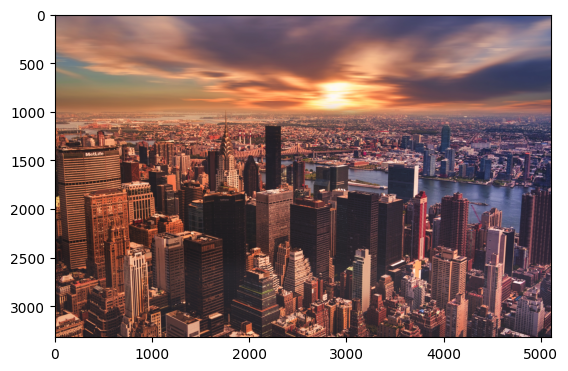

In [19]:
img=cv2.cvtColor(cv2.imread('test.jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(img)

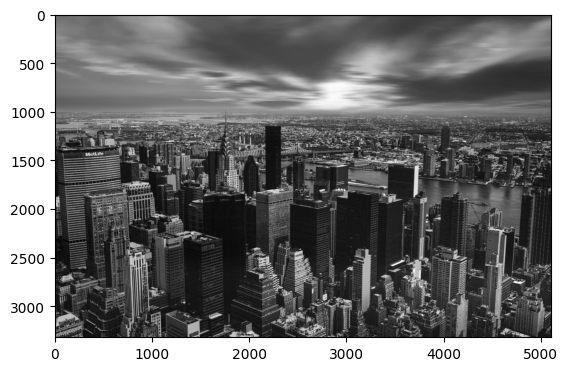

In [21]:
gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img,cmap='gray')

Now, we proceed with the color identification

In [50]:
def RGB2HEXA(color):
    print(color)
    return '#{:02x}{:02x}{:02x}'.format(int(color[0]),int(color[1]),int(color[2]))

In [23]:
def read_img(img_path):
    img=cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    return img

Let's get the input into a proper structure to be feed into out algorith. We know that the dimensions of input is h_x, w_x, n_c, where h_x = height, w_x = width and n_c = number of channels (RGB). We need the input to be h_x*w_x, n_c.

In [28]:
old_img_shape=img.shape
input_img=img.reshape(-1,old_img_shape[2])

Now, we initiate the K Means method.

In [30]:
num_colors=8
color_filter=KMeans(n_clusters=num_colors)
labels=color_filter.fit_predict(input_img)

c:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:

count=Counter(labels)

center_col=color_filter.cluster_centers_
color_in_order=[center_col[i] for i in count.keys()]
print(color_in_order)

hex_color=[RGB2HEXA(color) for color in color_in_order]

[array([143.27711287, 119.29081256, 125.5193001 ]), array([228.06405047, 158.15519257, 120.8847725 ]), array([ 93.28768453,  78.38194633, 100.13486282]), array([191.24624872, 122.43106094,  94.32014736]), array([146.89440405,  86.56064322,  73.83122467]), array([247.62234573, 208.04143164, 173.69310268]), array([48.3067382 , 38.26456466, 44.46968592]), array([89.16051683, 55.91376736, 55.41396388])]
[143.27711287 119.29081256 125.5193001 ]
[228.06405047 158.15519257 120.8847725 ]
[ 93.28768453  78.38194633 100.13486282]
[191.24624872 122.43106094  94.32014736]
[146.89440405  86.56064322  73.83122467]
[247.62234573 208.04143164 173.69310268]
[48.3067382  38.26456466 44.46968592]
[89.16051683 55.91376736 55.41396388]


In [52]:
print(hex_color)

['#8f777d', '#e49e78', '#5d4e64', '#bf7a5e', '#925649', '#f7d0ad', '#30262c', '#593737']


([<matplotlib.patches.Wedge at 0x274d217c950>,
 [Text(1.0465018884516264, 0.33887135828685766, '#8f777d'),
  Text(0.6867907420023515, 0.8592546052828927, '#e49e78'),
  Text(-0.043498137824223085, 1.0991396235264312, '#5d4e64'),
  Text(-0.8499737437356105, 0.6982439652156479, '#bf7a5e'),
  Text(-1.0973721831601615, -0.07598875986816128, '#925649'),
  Text(-0.9636545726999963, -0.5304430831996848, '#f7d0ad'),
  Text(-0.15402598823498748, -1.0891629790569617, '#30262c'),
  Text(0.9995830761566578, -0.4591662812763951, '#593737')])

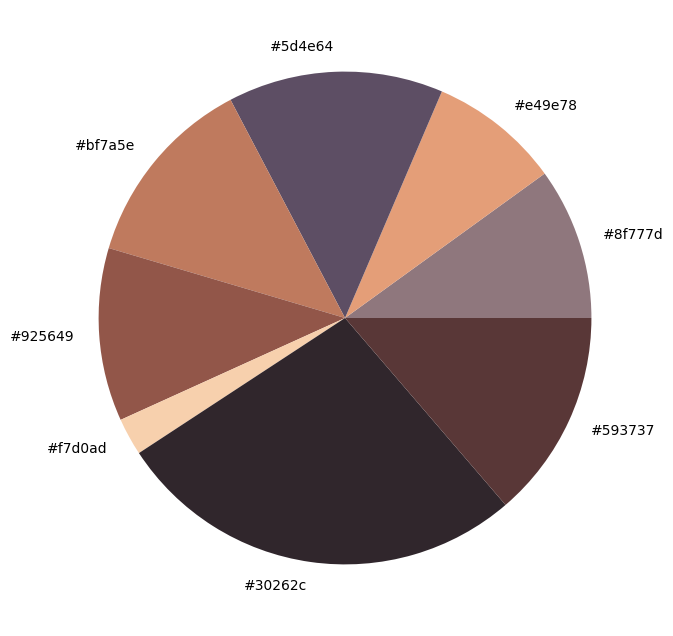

In [53]:
plt.figure(figsize=(10,8))
plt.pie(count.values(),labels=hex_color,colors=hex_color)

Let's implement K Means algorithm from scratch for better understanding as to what is happening. Because we have selected number of cluster as 8, we will initialize 8 centroids (in first these centroids will be random central values in input space across the three channels). Our input is input_img.

In [54]:
norm_input_img=input_img/255.
print(norm_input_img[0])

[0.50980392 0.42745098 0.45490196]


In [112]:
permute=np.random.choice(a=range(16941959),size=8,replace=False)

In [126]:
clusters=norm_input_img[permute]
labels=np.zeros(norm_input_img.shape[0])


Now for implementing K Means algorithms, we calculate the distance of the cluster from each point in the input image and assign a value from 0 to 7 to each of the input space points depending upon, which centrod is closest to them.

In [129]:
num_epochs=100
for i in range(num_epochs):
    distance=np.sum(norm_input_img**2,axis=1,keepdims=True)+np.sum(clusters**2,axis=1)-2*np.dot(norm_input_img,clusters.T)
    labels_new=np.argmin(distance,axis=1)
    if np.all(labels==labels_new):
        break
    labels=labels_new
    for i in range(num_colors):
        clusters[i]=np.mean(norm_input_img[labels==i],axis=0)





In [130]:
counts=Counter(labels)
print(counts)

Counter({5: 4212858, 1: 2742352, 6: 2142139, 3: 2032922, 2: 1794625, 7: 1693730, 4: 1578319, 0: 745015})


In [141]:
clusters=clusters*255.
ordered_clusters=[(clusters[i]) for i in counts.keys()]
print(clusters)
print(ordered_clusters)


[[244.70254693 194.14552996 156.35532439]
 [ 78.36343694  55.02139186  61.80833861]
 [217.80464833 144.69543888 109.82305607]
 [177.29950682 110.67348575  86.74107024]
 [148.45120219 123.33514328 126.56559606]
 [ 47.31585897  37.2915681   42.74494607]
 [100.57252868  83.66760047 104.85478347]
 [132.99614992  76.55182703  66.9694916 ]]
[array([148.45120219, 123.33514328, 126.56559606]), array([217.80464833, 144.69543888, 109.82305607]), array([100.57252868,  83.66760047, 104.85478347]), array([78.36343694, 55.02139186, 61.80833861]), array([177.29950682, 110.67348575,  86.74107024]), array([132.99614992,  76.55182703,  66.9694916 ]), array([244.70254693, 194.14552996, 156.35532439]), array([47.31585897, 37.2915681 , 42.74494607])]


In [142]:
hex_color=[RGB2HEXA(cluster) for cluster in ordered_clusters]
print(hex_color)

[148.45120219 123.33514328 126.56559606]
[217.80464833 144.69543888 109.82305607]
[100.57252868  83.66760047 104.85478347]
[78.36343694 55.02139186 61.80833861]
[177.29950682 110.67348575  86.74107024]
[132.99614992  76.55182703  66.9694916 ]
[244.70254693 194.14552996 156.35532439]
[47.31585897 37.2915681  42.74494607]
['#947b7e', '#d9906d', '#645368', '#4e373d', '#b16e56', '#844c42', '#f4c29c', '#2f252a']


([<matplotlib.patches.Wedge at 0x274d248f890>,
 [Text(1.0532240677787186, 0.3173626680182299, '#947b7e'),
  Text(0.6680411927012726, 0.8739113026241631, '#d9906d'),
  Text(-0.08498275404185075, 1.0967123285143934, '#645368'),
  Text(-0.9154288867692105, 0.60990979109085, '#4e373d'),
  Text(-1.0515912571904873, -0.3227318202479123, '#b16e56'),
  Text(-0.6046466741414126, -0.9189137062040856, '#844c42'),
  Text(-0.14233220904869656, -1.0907527411229907, '#f4c29c'),
  Text(0.781074832254061, -0.77454638751936, '#2f252a')])

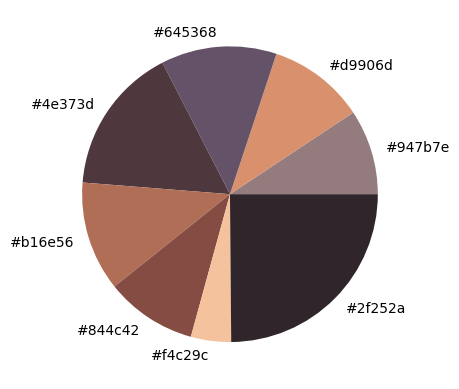

In [144]:
plt.pie(x=counts.values(),labels=hex_color,colors=hex_color)

From the pie charts of both models (implemented using Sklearn and scratch), it can be seen that the pie charts are nearly identical. The colors codes might be a bit different, that is because we limited the scratch imploementation to only 100 iterations. It can be seen that the Brownish black color is the highest representative color in our image. Remember that the above algorithm gives us the color clustering meaning that clusters of colors in images that are similar to each other. If you were to represent the image using only 8 colors in total, then these 8 would be the colors to use. Also, our image is 5103*3320 size. That's huge, which is also why this took lot of time for computation.